#### Loading all the necessary libraries required 

In [1]:
# necessary to plot properly on jupyter notebook
# ipython notebook
%matplotlib inline

# Import libraries for numerical computations
import pandas as pd
import numpy as np
import math

# Used for serializing - converting an object in memory to a byte stream,
# that can be stored and sent over a network
import pickle

# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Import libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier as MLPC

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, accuracy_score

# Finding the optimal parameter for each classifier
from sklearn.model_selection import GridSearchCV

#### Loading our dataset

In [2]:
trainingData = pd.read_csv('../data/train.csv')

''' 
Seperating the pixels from the labels in training Data
'''

X = trainingData.drop(labels = ["label"],axis = 1) # Everything apart from the first column in "X"-(pixel values)
y = trainingData["label"]  # Only the first column in 'X' - (label/answer)

#### Describing our dataset.

In [3]:
def describeDataset(input):
    """
    This function describes the shape of the dataset.  
    """
    print('')
    print("'X' shape: %s."%(X.shape,))
    print('')
    print("'y' shape: %s."%(y.shape,))
    print('')
    print("Unique elements in y: %s"%(np.unique(y)))
    
describeDataset(trainingData)


'X' shape: (42000, 784).

'y' shape: (42000,).

Unique elements in y: [0 1 2 3 4 5 6 7 8 9]


#### Visualizating our dataset

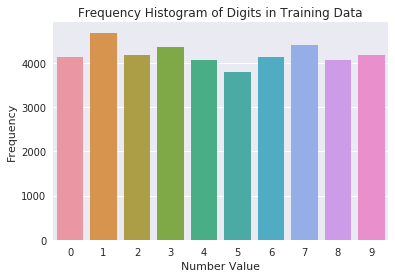

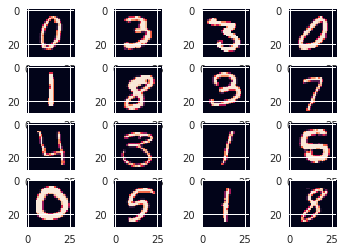

In [4]:
def histogramVisualization(labels):
    graph = sns.countplot(labels)
    labels.value_counts()
    plt.title("Frequency Histogram of Digits in Training Data")
    plt.xlabel('Number Value')
    plt.ylabel('Frequency')
    
histogramVisualization(y);


def visualizePixels(features):
    # plot the first 20 digits in the training set. 
    f, ax = plt.subplots(4, 4)
    # plot some 4s as an example
    for i in range(21):
        # Create a 1024x1024x3 array of 8 bit unsigned integers
        data = features.iloc[i,0:785].values # This is the first number
        nrows, ncols = 28, 28
        grid = data.reshape((nrows, ncols))
        n=math.ceil(i/5)-1
        m=[0,1,2,3]*5
        ax[m[i-1], n].imshow(grid)
        
visualizePixels(X)

#### Spliting our dataset into train and test

In [5]:
X = trainingData.iloc[0:500,1:] # everything but the first column for the first 50 examples (pixel values)
y = trainingData.iloc[0:500,:1] # first column only for the first 50 examples (label/answer)


X_train = 0
X_test = 0
Y_train = 0
Y_test = 0
xValues = X
yValues = y.values.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(xValues, yValues, test_size=0.2, random_state=20)

#### Comparing different models

In [6]:
# Let's compare five of these algorithms

def compareABunchOfDifferentModelsAccuracy(input):
    """
    This function takes as an input the dataframe "trainingData" which contains the data from "data.csv".  
    The output is a table and boxplot illustrating the accuracy score for each of nine algorithms given this input.
    """    

    print('')
    print('Compare Multiple Classifiers:')
    print('')
    print('K-Fold Cross-Validation Accuracy:')
    print('')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('MLPC', MLPC()))
        
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(X_train, Y_train)
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        accuracy_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)
   
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return

In [7]:
def defineModels():
    """
    This function just defines each abbreviation used in the previous function (e.g. LR = Logistic Regression)
    """
    print('')
    print('LR = LogisticRegression')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('MLPC = Multi-layer Perceptron NN')
    print('')
    return

#### Before binary conversion


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.787500 (0.074372)
KNN: 0.782500 (0.064275)
SVM: 0.132500 (0.043373)
LSVM: 0.775000 (0.080623)
MLPC: 0.750000 (0.076649)


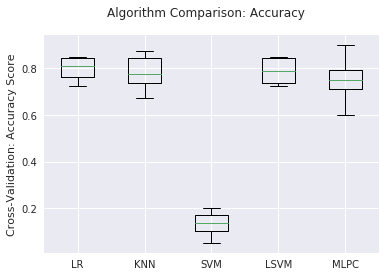


LR = LogisticRegression
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
MLPC = Multi-layer Perceptron NN



In [8]:
compareABunchOfDifferentModelsAccuracy(trainingData)
defineModels()

#### After binary conversion


After binary conversion:


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.802500 (0.071107)
KNN: 0.782500 (0.064275)
SVM: 0.635000 (0.105000)
LSVM: 0.792500 (0.058149)
MLPC: 0.832500 (0.065240)


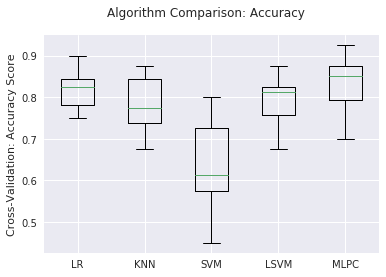


LR = LogisticRegression
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
MLPC = Multi-layer Perceptron NN



In [9]:
X_train = X_train/ 256
X_test = X_test / 256

print('')
print('After binary conversion:')
print('')
compareABunchOfDifferentModelsAccuracy(trainingData)
defineModels()

#### Implementation of different algorithms with cross validation

In [10]:
def executeLogisticRegression(a,b,c,d):
    """ Run a Logistic Regression"""  
    classifier = LogisticRegression()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('')
    print('SKlearn Logistic Regression - Training set accuracy: {:.2f} ({:.2f})'.format(mean*100, stdev))
    print('')
    
def executeSVC(a,b,c,d):
    """ Run a SVC """
    classifier = SVC()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SKlearn Support Vector Machine - Training set accuracy: {:.2f} ({:.2f})'.format(mean*100, stdev))
    print('')
    
def executeKNN(a,b,c,d):
    """ Run a KNN"""
    classifier = KNeighborsClassifier()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SKlearn K-Nearest Neighbor Classifier - Training set accuracy: {:.2f} ({:.2f})'.format(mean*100, stdev))
    print('')
    
def executeMLPC(a,b,c,d):
    classifier = MLPC()
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SKlearn Multi-layer Perceptron NN - Training set accuracy: {:.2f} ({:.2f})'.format(mean*100, stdev))
    print('')

In [11]:
executeLogisticRegression(X_train, Y_train, X_test, Y_test)
executeSVC(X_train, Y_train, X_test, Y_test)
executeKNN(X_train, Y_train, X_test, Y_test)
executeMLPC(X_train, Y_train,  X_test, Y_test)


SKlearn Logistic Regression - Training set accuracy: 72.00 (0.15)

SKlearn Support Vector Machine - Training set accuracy: 15.00 (0.08)

SKlearn K-Nearest Neighbor Classifier - Training set accuracy: 61.00 (0.23)

SKlearn Multi-layer Perceptron NN - Training set accuracy: 69.00 (0.18)



#### Plotting the learning curves to help with the decision of which algorithm to use

In [12]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/davidpraise/anaconda3/envs/tf/lib/python3.6/site-packages/matplotlib/pyplot.py'>

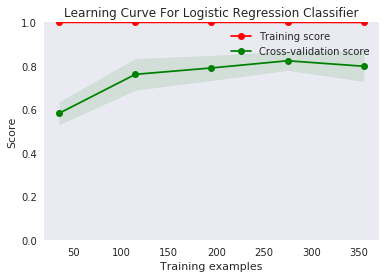

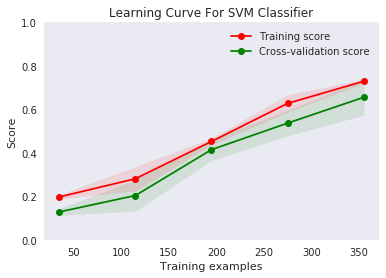

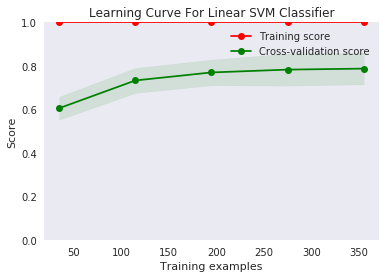

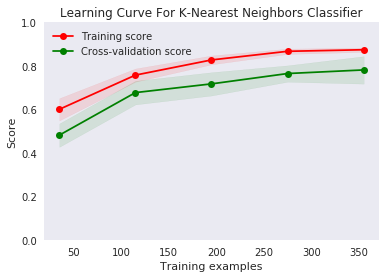

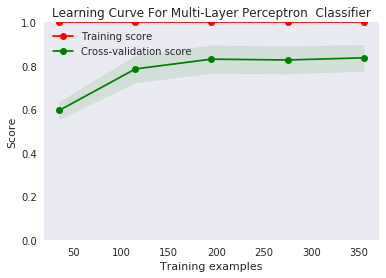

In [13]:
plot_learning_curve(LogisticRegression(), 'Learning Curve For Logistic Regression Classifier', X_train, Y_train, (0,1), 10)
plot_learning_curve(SVC(), 'Learning Curve For SVM Classifier', X_train, Y_train, (0,1), 10)
plot_learning_curve(LinearSVC(), 'Learning Curve For Linear SVM Classifier', X_train, Y_train, (0,1), 10)
plot_learning_curve(KNeighborsClassifier(), 'Learning Curve For K-Nearest Neighbors Classifier', X_train, Y_train, (0,1), 10)
plot_learning_curve(MLPC(), 'Learning Curve For Multi-Layer Perceptron  Classifier', X_train, Y_train, (0,1), 10)

#### Optimizing our algorithms  parameters

In [14]:
# Optimized Parameters for LR
    
def selectParametersForLR(a, b, c, d):

    model = LogisticRegression()
    parameters = {'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10, 25, 50, 100],
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear']}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer, error_score = 0.01)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for LR:')
    print('')
    print(model)
    print('')
    predictions = model.predict(c)
    print(accuracy_score(d, predictions))
    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Logistic Regression - { (mean : %s) : (std : %s) }' % (mean, stdev))
    print('')
    print('')
    return 

In [15]:
# Optimized Parameters for SVM

def selectParametersForSVM(a, b, c, d):

    model = SVC()
    parameters = {'C': [0.01, 0.1, 0.5, 1.0, 5.0, 10, 25, 50, 100],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for SVM:')
    print('')
    print(model)
    print('')
    predictions = model.predict(c)
    print(accuracy_score(d, predictions))
    print('Linear Support Vector Machine - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Linear Support Vector Machine - { (mean : %s) : (std : %s) }' % (mean, stdev))
    print('')
    print('')
    return 


In [16]:
# Optimized Parameters for KNN

def selectParametersForKNN(a, b, c, d):

    model = KNeighborsClassifier()
    parameters = {'n_neighbors': [5, 10, 25, 50],
                  'algorithm': ['ball_tree', 'kd_tree'],
                  'leaf_size': [5, 10, 25, 50]}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for KNN:')
    print('')
    print(model)
    print('')
    predictions = model.predict(c)
    print(accuracy_score(d, predictions))
    print('K-Nearest Neighbors - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('K-Nearest Neighbors Classifier - { (mean : %s) : (std : %s) }' % (mean, stdev))
    print('')
    print('')
    return 


In [17]:
# Optimized Parameters for MLP-NN

def selectParametersForMLPC(a, b, c, d):

    model = MLPC()
    parameters = {'verbose': [False],
                  'activation': ['logistic', 'relu'],
                  'hidden_layer_sizes': [100, 200]}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for Multi-Layer Perceptron NN:')
    print('')
    print(model)
    print('')
    predictions = model.predict(c)
    print(accuracy_score(d, predictions))
    print('SKlearn Multi-Layer Perceptron - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SKlearn Multi-Layer Perceptron - { (mean : %s) : (std : %s) }' % (mean, stdev))
    print('')
    print('')
    return 

In [18]:
selectParametersForLR(X_train, Y_train, X_test, Y_test);

Selected Parameters for LR:

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

0.77
Logistic Regression - Training set accuracy: 0.77
Logistic Regression - { (mean : 0.7) : (std : 0.18439088914585774) }




In [19]:
selectParametersForSVM(X_train, Y_train, X_test, Y_test);

Selected Parameters for SVM:

SVC(C=25, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.75
Linear Support Vector Machine - Training set accuracy: 0.75
Linear Support Vector Machine - { (mean : 0.7100000000000001) : (std : 0.17578395831246946) }




In [20]:
selectParametersForKNN(X_train, Y_train,  X_test, Y_test);

Selected Parameters for KNN:

KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

0.72
K-Nearest Neighbors - Training set accuracy: 0.72
K-Nearest Neighbors Classifier - { (mean : 0.56) : (std : 0.21999999999999997) }




In [21]:
selectParametersForMLPC(X_train, Y_train,  X_test, Y_test);;

SyntaxError: invalid syntax (<ipython-input-21-2c37f3a9028d>, line 1)

#### Final result